In [17]:
import numpy as np
import cv2
import os
import time
import requests
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

In [18]:
#Transform coding (DCT) untuk gambar/video
def apply_dct_2d(image):
    return dct(dct(image.T, norm='ortho').T, norm='ortho')

def apply_idct_2d(coeffs):
    return idct(idct(coeffs.T, norm='ortho').T, norm='ortho')

#Dictionary-based (LZW sederhana) untuk teks
def lzw_compress(data):
    dict_size = 256
    dictionary = {chr(i): i for i in range(dict_size)}
    w = ""
    result = []
    for c in data:
        wc = w + c
        if wc in dictionary:
            w = wc
            
        else:
            result.append(dictionary[w])
            dictionary[wc] = dict_size
            dict_size += 1
            w = c
    if w: result.append(dictionary[w])
    return result

#Analisis performa
def calculate_metrics(original_size, compressed_size, start_time, end_time):
    cr = original_size / compressed_size
    duration = end_time - start_time
    return {"Compression Ratio": cr, "Waktu(s)": duration}

In [19]:
#Load Dataset
sample_text = "Tugas Besar Koding Kompresi 2025. Telkom University." * 1000 

print("--- ANALISIS TEMA 1 ---")
start = time.time()
compressed_data = lzw_compress(sample_text)
end = time.time()

original_size = len(sample_text.encode('utf-8'))
compressed_size = len(compressed_data) * 2 # Asumsi 16-bit per code

metrics = calculate_metrics(original_size, compressed_size, start, end)
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

--- ANALISIS TEMA 1 ---
Compression Ratio: 11.3339
Waktu(s): 0.0050


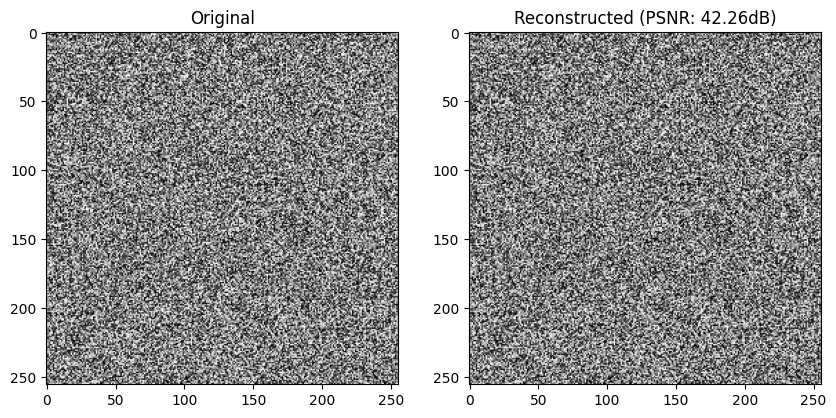

In [20]:
# Load Image (Pastikan file ada di folder)
img = np.random.randint(0, 255, (256, 256), dtype=np.uint8) # Placeholder

def process_tema2(image):
    # Transform
    dct_coeffs = apply_dct_2d(image.astype(float))
    # Quantization sederhana (Thresholding)
    dct_coeffs[np.abs(dct_coeffs) < 10] = 0 
    # Reconstruct
    reconstructed = apply_idct_2d(dct_coeffs).astype(np.uint8)
    
    # Hitung PSNR (Wajib)
    mse = np.mean((image - reconstructed) ** 2)
    psnr = 20 * np.log10(255.0 / np.sqrt(mse)) if mse != 0 else 100
    return reconstructed, psnr

reconstructed_img, psnr_val = process_tema2(img)

# Visualisasi (Wajib)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(img, cmap='gray'); plt.title("Original")
plt.subplot(1, 2, 2); plt.imshow(reconstructed_img, cmap='gray'); plt.title(f"Reconstructed (PSNR: {psnr_val:.2f}dB)")
plt.show()

In [21]:
# Tema 3 fokus pada Inter-frame (Predictive)
def temporal_compression(frame1, frame2):
    diff = cv2.absdiff(frame1, frame2)
    return diff

# Analisis: Tampilkan Bit Rate dan Performa antar frame
print("Analisis Tema 3: Mengurangi redundansi temporal antar frame.")

Analisis Tema 3: Mengurangi redundansi temporal antar frame.
